In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from hydramuscle.model.smc import SMC
from hydramuscle.model.layer import Layer

In [23]:
def calc_prop_range(data, step_time=1, thres=0.1):
    nsteps, numx, numy = data.shape
    
    # Extract longitudinal and circular data separately
    data_x = data[:, :, numy // 2]
    data_y = data[:, numx // 2, :]
    
    # Track wavefronts
    wavefronts_x = np.zeros(nsteps) + numx // 2
    wavefronts_y = np.zeros(nsteps) + numy // 2
    
    for i in range(nsteps):
        for k in range(numx - 1, numx // 2 + 1, -1):
            if data_x[i, k] > thres:
                wavefronts_x[i] = k
                break
        
        for k in range(numy - 1, numy // 2 + 1, -1):
            if data_y[i, k] > thres:
                wavefronts_y[i] = k
                break
    
    # Calculate range
    range_x = max(wavefronts_x - numx // 2)
    range_y = max(wavefronts_y - numy // 2)
    
    return range_x, range_y #, wavefronts_x, wavefronts_y

In [24]:
def calc_prop_speed(data, step_time=1, thres=0.1, axis='y'):
    nsteps, numx, numy = data.shape
    
    if axis == 'y':
        data_y = data[:, numx // 2, :]
        # Locate the moment of each cell that reaches its peak
        speed = 0
        for y in range(numy // 2 + 1, numy):
            cell = data_y[:, y]
            tpeak = np.argmax(cell)
            if np.max(cell) > thres:
                speed = y / (tpeak * step_time)
        return speed
    
    elif axis == 'x':
        data_x = data[:, :, numy // 2]
        # Locate the moment of each cell that reaches its peak
        speed = 0
        for x in range(numx // 2 + 1, numx):
            cell = data_x[:, x]
            tpeak = np.argmax(cell)
            if np.max(cell) > thres:
                speed = x / (tpeak * step_time)
        return speed

In [25]:
numx = 30
numy = 60
T = 50
dt = 0.1
save_interval = 10

In [26]:
# Initiation data
# gip3x_range = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# gip3y_range = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

gip3x_range = np.arange(0, 2.1, 0.1)
gip3y_range = np.arange(0, 2.1, 0.1)

calcium = np.zeros((len(gip3x_range), 
                    len(gip3y_range), 
                    numx * numy * int(T/dt/save_interval)))

# Construct layer
smc = SMC(T=T, dt=dt, k_ipr=0.2, s0=100, k_deg=0.05)
layer = Layer(smc, 
              numx=numx, 
              numy=numy, 
              gip3x=0.0, 
              gip3y=0.0, 
              gcx=1000, 
              gcy=1000,
              save_interval=save_interval)
layer.set_stim_pattern("slow", xmin=14, xmax=16, ymin=29, ymax=31,
                          stim_times=[0])

# Tuning parameters
for i, gip3x in enumerate(gip3x_range):
    for j, gip3y in enumerate(gip3y_range):
        
        layer._gip3x = gip3x
        layer._gip3y = gip3y
        layer._set_conn_mat()
        
        print(i, j)
        
        sol = layer.run()
        calcium[i, j] = sol.reshape(-1)

  0%|          | 0/500 [00:00<?, ?it/s]

0 0
0 1


  0%|          | 0/500 [00:00<?, ?it/s]

0 2
0 3


  0%|          | 0/500 [00:00<?, ?it/s]

0 4
0 5


  0%|          | 0/500 [00:00<?, ?it/s]

0 6
0 7


  0%|          | 0/500 [00:00<?, ?it/s]

0 8
0 9


  0%|          | 0/500 [00:00<?, ?it/s]

0 10
0 11


  0%|          | 0/500 [00:00<?, ?it/s]

0 12
0 13


  0%|          | 0/500 [00:00<?, ?it/s]

0 14
0 15


  0%|          | 0/500 [00:00<?, ?it/s]

0 16
0 17


  0%|          | 0/500 [00:00<?, ?it/s]

0 18
0 19


  0%|          | 0/500 [00:00<?, ?it/s]

0 20
1 0


  0%|          | 0/500 [00:00<?, ?it/s]

1 1
1 2


100%|██████████| 500/500 [00:00<00:00, 2552.22it/s]

1 3
1 4



  0%|          | 0/500 [00:00<?, ?it/s]

1 5
1 6


  0%|          | 0/500 [00:00<?, ?it/s]

1 7
1 8


  0%|          | 0/500 [00:00<?, ?it/s]

1 9
1 10


  0%|          | 0/500 [00:00<?, ?it/s]

1 11
1 12


  0%|          | 0/500 [00:00<?, ?it/s]

1 13
1 14


  0%|          | 0/500 [00:00<?, ?it/s]

1 15
1 16


  0%|          | 0/500 [00:00<?, ?it/s]

1 17
1 18


  0%|          | 0/500 [00:00<?, ?it/s]

1 19
1 20


  0%|          | 0/500 [00:00<?, ?it/s]

2 0
2 1


  0%|          | 0/500 [00:00<?, ?it/s]

2 2
2 3


  0%|          | 0/500 [00:00<?, ?it/s]

2 4
2 5


  0%|          | 0/500 [00:00<?, ?it/s]

2 6
2 7


  0%|          | 0/500 [00:00<?, ?it/s]

2 8
2 9


  0%|          | 0/500 [00:00<?, ?it/s]

2 10
2 11


  0%|          | 0/500 [00:00<?, ?it/s]

2 12
2 13


  0%|          | 0/500 [00:00<?, ?it/s]

2 14
2 15


  0%|          | 0/500 [00:00<?, ?it/s]

2 16
2 17


  0%|          | 0/500 [00:00<?, ?it/s]

2 18
2 19


  0%|          | 0/500 [00:00<?, ?it/s]

2 20
3 0


  0%|          | 0/500 [00:00<?, ?it/s]

3 1
3 2


  0%|          | 0/500 [00:00<?, ?it/s]

3 3
3 4


  0%|          | 0/500 [00:00<?, ?it/s]

3 5
3 6


  0%|          | 0/500 [00:00<?, ?it/s]

3 7
3 8


  0%|          | 0/500 [00:00<?, ?it/s]

3 9
3 10


  0%|          | 0/500 [00:00<?, ?it/s]

3 11
3 12


  0%|          | 0/500 [00:00<?, ?it/s]

3 13
3 14


 55%|█████▍    | 273/500 [00:00<00:00, 2721.87it/s]

3 15


 44%|████▍     | 220/500 [00:00<00:00, 2197.12it/s]

3 16


 47%|████▋     | 233/500 [00:00<00:00, 2327.07it/s]

3 17


 48%|████▊     | 238/500 [00:00<00:00, 2374.67it/s]

3 18


 48%|████▊     | 241/500 [00:00<00:00, 2409.00it/s]

3 19


  0%|          | 0/500 [00:00<?, ?it/s]

3 20
4 0


  0%|          | 0/500 [00:00<?, ?it/s]

4 1
4 2


  0%|          | 0/500 [00:00<?, ?it/s]

4 3
4 4


  0%|          | 0/500 [00:00<?, ?it/s]

4 5
4 6


100%|██████████| 500/500 [00:00<00:00, 2540.88it/s]

4 7



  0%|          | 0/500 [00:00<?, ?it/s]

4 8
4 9


  0%|          | 0/500 [00:00<?, ?it/s]

4 10
4 11


  0%|          | 0/500 [00:00<?, ?it/s]

4 12
4 13


  0%|          | 0/500 [00:00<?, ?it/s]

4 14
4 15


  0%|          | 0/500 [00:00<?, ?it/s]

4 16
4 17


  0%|          | 0/500 [00:00<?, ?it/s]

4 18
4 19


  0%|          | 0/500 [00:00<?, ?it/s]

4 20
5 0


  0%|          | 0/500 [00:00<?, ?it/s]

5 1
5 2


  0%|          | 0/500 [00:00<?, ?it/s]

5 3
5 4


  0%|          | 0/500 [00:00<?, ?it/s]

5 5
5 6


  0%|          | 0/500 [00:00<?, ?it/s]

5 7
5 8


  0%|          | 0/500 [00:00<?, ?it/s]

5 9
5 10


  0%|          | 0/500 [00:00<?, ?it/s]

5 11
5 12


  0%|          | 0/500 [00:00<?, ?it/s]

5 13
5 14


  0%|          | 0/500 [00:00<?, ?it/s]

5 15
5 16


  0%|          | 0/500 [00:00<?, ?it/s]

5 17
5 18


  0%|          | 0/500 [00:00<?, ?it/s]

5 19
5 20


  0%|          | 0/500 [00:00<?, ?it/s]

6 0
6 1


  0%|          | 0/500 [00:00<?, ?it/s]

6 2
6 3


  0%|          | 0/500 [00:00<?, ?it/s]

6 4
6 5


  0%|          | 0/500 [00:00<?, ?it/s]

6 6
6 7


  0%|          | 0/500 [00:00<?, ?it/s]

6 8
6 9


  0%|          | 0/500 [00:00<?, ?it/s]

6 10
6 11


  0%|          | 0/500 [00:00<?, ?it/s]

6 12
6 13


  0%|          | 0/500 [00:00<?, ?it/s]

6 14
6 15


 53%|█████▎    | 264/500 [00:00<00:00, 2639.68it/s]

6 16


  0%|          | 0/500 [00:00<?, ?it/s]

6 17
6 18


  0%|          | 0/500 [00:00<?, ?it/s]

6 19
6 20


  0%|          | 0/500 [00:00<?, ?it/s]

7 0
7 1


  0%|          | 0/500 [00:00<?, ?it/s]

7 2
7 3


  0%|          | 0/500 [00:00<?, ?it/s]

7 4
7 5


  0%|          | 0/500 [00:00<?, ?it/s]

7 6
7 7


  0%|          | 0/500 [00:00<?, ?it/s]

7 8
7 9


  0%|          | 0/500 [00:00<?, ?it/s]

7 10
7 11


  0%|          | 0/500 [00:00<?, ?it/s]

7 12
7 13


  0%|          | 0/500 [00:00<?, ?it/s]

7 14
7 15


  0%|          | 0/500 [00:00<?, ?it/s]

7 16
7 17


  0%|          | 0/500 [00:00<?, ?it/s]

7 18
7 19


  0%|          | 0/500 [00:00<?, ?it/s]

7 20
8 0


  0%|          | 0/500 [00:00<?, ?it/s]

8 1
8 2


  0%|          | 0/500 [00:00<?, ?it/s]

8 3
8 4


  0%|          | 0/500 [00:00<?, ?it/s]

8 5
8 6


  0%|          | 0/500 [00:00<?, ?it/s]

8 7
8 8


  0%|          | 0/500 [00:00<?, ?it/s]

8 9
8 10


  0%|          | 0/500 [00:00<?, ?it/s]

8 11
8 12


  0%|          | 0/500 [00:00<?, ?it/s]

8 13
8 14


  0%|          | 0/500 [00:00<?, ?it/s]

8 15
8 16


  0%|          | 0/500 [00:00<?, ?it/s]

8 17
8 18


  0%|          | 0/500 [00:00<?, ?it/s]

8 19
8 20


  0%|          | 0/500 [00:00<?, ?it/s]

9 0
9 1


  0%|          | 0/500 [00:00<?, ?it/s]

9 2
9 3


  0%|          | 0/500 [00:00<?, ?it/s]

9 4
9 5


  0%|          | 0/500 [00:00<?, ?it/s]

9 6
9 7


  0%|          | 0/500 [00:00<?, ?it/s]

9 8
9 9


  0%|          | 0/500 [00:00<?, ?it/s]

9 10
9 11


  0%|          | 0/500 [00:00<?, ?it/s]

9 12
9 13


  0%|          | 0/500 [00:00<?, ?it/s]

9 14
9 15


  0%|          | 0/500 [00:00<?, ?it/s]

9 16
9 17


  0%|          | 0/500 [00:00<?, ?it/s]

9 18
9 19


  0%|          | 0/500 [00:00<?, ?it/s]

9 20
10 0


  0%|          | 0/500 [00:00<?, ?it/s]

10 1
10 2


  0%|          | 0/500 [00:00<?, ?it/s]

10 3
10 4


  0%|          | 0/500 [00:00<?, ?it/s]

10 5
10 6


  0%|          | 0/500 [00:00<?, ?it/s]

10 7
10 8


  0%|          | 0/500 [00:00<?, ?it/s]

10 9
10 10


  0%|          | 0/500 [00:00<?, ?it/s]

10 11
10 12


  0%|          | 0/500 [00:00<?, ?it/s]

10 13
10 14


  0%|          | 0/500 [00:00<?, ?it/s]

10 15
10 16


  0%|          | 0/500 [00:00<?, ?it/s]

10 17
10 18


  0%|          | 0/500 [00:00<?, ?it/s]

10 19
10 20


  0%|          | 0/500 [00:00<?, ?it/s]

11 0
11 1


  0%|          | 0/500 [00:00<?, ?it/s]

11 2
11 3


 43%|████▎     | 217/500 [00:00<00:00, 2161.80it/s]

11 4


  0%|          | 0/500 [00:00<?, ?it/s]

11 5
11 6


  0%|          | 0/500 [00:00<?, ?it/s]

11 7
11 8


  0%|          | 0/500 [00:00<?, ?it/s]

11 9
11 10


  0%|          | 0/500 [00:00<?, ?it/s]

11 11
11 12


  0%|          | 0/500 [00:00<?, ?it/s]

11 13
11 14


  0%|          | 0/500 [00:00<?, ?it/s]

11 15
11 16


  0%|          | 0/500 [00:00<?, ?it/s]

11 17
11 18


  0%|          | 0/500 [00:00<?, ?it/s]

11 19
11 20


  0%|          | 0/500 [00:00<?, ?it/s]

12 0
12 1


  0%|          | 0/500 [00:00<?, ?it/s]

12 2
12 3


  0%|          | 0/500 [00:00<?, ?it/s]

12 4
12 5


  0%|          | 0/500 [00:00<?, ?it/s]

12 6
12 7


  0%|          | 0/500 [00:00<?, ?it/s]

12 8
12 9


  0%|          | 0/500 [00:00<?, ?it/s]

12 10
12 11


  0%|          | 0/500 [00:00<?, ?it/s]

12 12
12 13


  0%|          | 0/500 [00:00<?, ?it/s]

12 14
12 15


  0%|          | 0/500 [00:00<?, ?it/s]

12 16
12 17


  0%|          | 0/500 [00:00<?, ?it/s]

12 18
12 19


  0%|          | 0/500 [00:00<?, ?it/s]

12 20
13 0


  0%|          | 0/500 [00:00<?, ?it/s]

13 1
13 2


  0%|          | 0/500 [00:00<?, ?it/s]

13 3
13 4


  0%|          | 0/500 [00:00<?, ?it/s]

13 5
13 6


  0%|          | 0/500 [00:00<?, ?it/s]

13 7
13 8


  0%|          | 0/500 [00:00<?, ?it/s]

13 9
13 10


  0%|          | 0/500 [00:00<?, ?it/s]

13 11
13 12


  0%|          | 0/500 [00:00<?, ?it/s]

13 13
13 14


  0%|          | 0/500 [00:00<?, ?it/s]

13 15
13 16


  0%|          | 0/500 [00:00<?, ?it/s]

13 17
13 18


  0%|          | 0/500 [00:00<?, ?it/s]

13 19
13 20


  0%|          | 0/500 [00:00<?, ?it/s]

14 0
14 1


  0%|          | 0/500 [00:00<?, ?it/s]

14 2
14 3


  0%|          | 0/500 [00:00<?, ?it/s]

14 4
14 5


  0%|          | 0/500 [00:00<?, ?it/s]

14 6
14 7


  0%|          | 0/500 [00:00<?, ?it/s]

14 8
14 9


  0%|          | 0/500 [00:00<?, ?it/s]

14 10
14 11


  0%|          | 0/500 [00:00<?, ?it/s]

14 12
14 13


  0%|          | 0/500 [00:00<?, ?it/s]

14 14
14 15


  0%|          | 0/500 [00:00<?, ?it/s]

14 16
14 17


  0%|          | 0/500 [00:00<?, ?it/s]

14 18
14 19


  0%|          | 0/500 [00:00<?, ?it/s]

14 20
15 0


  0%|          | 0/500 [00:00<?, ?it/s]

15 1
15 2


  0%|          | 0/500 [00:00<?, ?it/s]

15 3
15 4


  0%|          | 0/500 [00:00<?, ?it/s]

15 5
15 6


  0%|          | 0/500 [00:00<?, ?it/s]

15 7
15 8


  0%|          | 0/500 [00:00<?, ?it/s]

15 9
15 10


  0%|          | 0/500 [00:00<?, ?it/s]

15 11
15 12


  0%|          | 0/500 [00:00<?, ?it/s]

15 13
15 14


  0%|          | 0/500 [00:00<?, ?it/s]

15 15
15 16


  0%|          | 0/500 [00:00<?, ?it/s]

15 17
15 18


  0%|          | 0/500 [00:00<?, ?it/s]

15 19
15 20


  0%|          | 0/500 [00:00<?, ?it/s]

16 0
16 1


  0%|          | 0/500 [00:00<?, ?it/s]

16 2
16 3


  0%|          | 0/500 [00:00<?, ?it/s]

16 4
16 5


  0%|          | 0/500 [00:00<?, ?it/s]

16 6
16 7


  0%|          | 0/500 [00:00<?, ?it/s]

16 8
16 9


  0%|          | 0/500 [00:00<?, ?it/s]

16 10
16 11


  0%|          | 0/500 [00:00<?, ?it/s]

16 12
16 13


  0%|          | 0/500 [00:00<?, ?it/s]

16 14
16 15


  0%|          | 0/500 [00:00<?, ?it/s]

16 16
16 17


  0%|          | 0/500 [00:00<?, ?it/s]

16 18
16 19


  0%|          | 0/500 [00:00<?, ?it/s]

16 20
17 0


  0%|          | 0/500 [00:00<?, ?it/s]

17 1
17 2


  0%|          | 0/500 [00:00<?, ?it/s]

17 3
17 4


  0%|          | 0/500 [00:00<?, ?it/s]

17 5
17 6


  0%|          | 0/500 [00:00<?, ?it/s]

17 7
17 8


  0%|          | 0/500 [00:00<?, ?it/s]

17 9
17 10


  0%|          | 0/500 [00:00<?, ?it/s]

17 11
17 12


  0%|          | 0/500 [00:00<?, ?it/s]

17 13
17 14


  0%|          | 0/500 [00:00<?, ?it/s]

17 15
17 16


  0%|          | 0/500 [00:00<?, ?it/s]

17 17
17 18


  0%|          | 0/500 [00:00<?, ?it/s]

17 19
17 20


  0%|          | 0/500 [00:00<?, ?it/s]

18 0
18 1


  0%|          | 0/500 [00:00<?, ?it/s]

18 2
18 3


  0%|          | 0/500 [00:00<?, ?it/s]

18 4
18 5


  0%|          | 0/500 [00:00<?, ?it/s]

18 6
18 7


  0%|          | 0/500 [00:00<?, ?it/s]

18 8
18 9


  0%|          | 0/500 [00:00<?, ?it/s]

18 10
18 11


  0%|          | 0/500 [00:00<?, ?it/s]

18 12
18 13


  0%|          | 0/500 [00:00<?, ?it/s]

18 14
18 15


  0%|          | 0/500 [00:00<?, ?it/s]

18 16
18 17


  0%|          | 0/500 [00:00<?, ?it/s]

18 18
18 19


  0%|          | 0/500 [00:00<?, ?it/s]

18 20
19 0


  0%|          | 0/500 [00:00<?, ?it/s]

19 1
19 2


  0%|          | 0/500 [00:00<?, ?it/s]

19 3
19 4


  0%|          | 0/500 [00:00<?, ?it/s]

19 5
19 6


  0%|          | 0/500 [00:00<?, ?it/s]

19 7
19 8


  0%|          | 0/500 [00:00<?, ?it/s]

19 9
19 10


  0%|          | 0/500 [00:00<?, ?it/s]

19 11
19 12


  0%|          | 0/500 [00:00<?, ?it/s]

19 13
19 14


  0%|          | 0/500 [00:00<?, ?it/s]

19 15
19 16


  0%|          | 0/500 [00:00<?, ?it/s]

19 17
19 18


  0%|          | 0/500 [00:00<?, ?it/s]

19 19
19 20


  0%|          | 0/500 [00:00<?, ?it/s]

20 0
20 1


  0%|          | 0/500 [00:00<?, ?it/s]

20 2
20 3


  0%|          | 0/500 [00:00<?, ?it/s]

20 4
20 5


  0%|          | 0/500 [00:00<?, ?it/s]

20 6
20 7


  0%|          | 0/500 [00:00<?, ?it/s]

20 8
20 9


  0%|          | 0/500 [00:00<?, ?it/s]

20 10
20 11


  0%|          | 0/500 [00:00<?, ?it/s]

20 12
20 13


  0%|          | 0/500 [00:00<?, ?it/s]

20 14
20 15


  0%|          | 0/500 [00:00<?, ?it/s]

20 16
20 17


  0%|          | 0/500 [00:00<?, ?it/s]

20 18
20 19


100%|██████████| 500/500 [00:00<00:00, 2624.13it/s]

20 20


In [27]:
calcium = calcium.reshape(len(gip3x_range), len(gip3y_range), int(T/dt/save_interval), numx, numy)

In [28]:
import pickle
with open('../results/data/calcium.pickle', 'wb') as handle:
    pickle.dump(calcium, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [29]:
speed_slow_x = np.zeros((len(gip3x_range), len(gip3y_range)))
speed_slow_y = np.zeros((len(gip3x_range), len(gip3y_range)))

for i in range(len(gip3x_range)):
    for j in range(len(gip3y_range)):
        speed_x = calc_prop_speed(calcium[i, j], thres=0.1, axis='x')
        speed_y = calc_prop_speed(calcium[i, j], thres=0.1, axis='y')
        speed_slow_x[i, j], speed_slow_y[i, j] = speed_x, speed_y

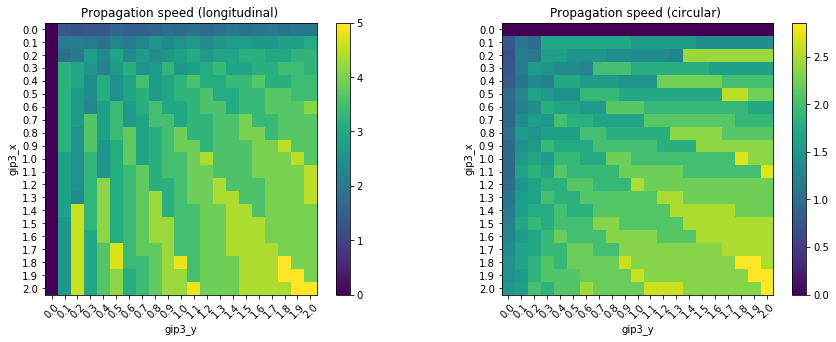

In [30]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(speed_slow_y)
ax1.set_xticks(range(0, 21))
ax1.set_xticklabels(np.round(gip3y_range,1), rotation=45)
ax1.set_yticks(range(0, 21))
ax1.set_yticklabels(np.round(gip3x_range,1))
ax1.set_xlabel('gip3_y')
ax1.set_ylabel('gip3_x')
fig.colorbar(im1, ax=ax1, fraction=0.045)
ax1.set_title('Propagation speed (longitudinal) ')

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(speed_slow_x)
ax2.set_xticks(range(0, 21))
ax2.set_xticklabels(np.round(gip3y_range,1), rotation=45)
ax2.set_yticks(range(0, 21))
ax2.set_yticklabels(np.round(gip3x_range,1))
ax2.set_xlabel('gip3_y')
ax2.set_ylabel('gip3_x')
fig.colorbar(im2, ax=ax2, fraction=0.045)
ax2.set_title('Propagation speed (circular) ')
plt.savefig('../results/figures/speed_slow.pdf', bbox_inches='tight')
plt.show()

In [31]:
range_slow_x = np.zeros((len(gip3x_range), len(gip3y_range)))
range_slow_y = np.zeros((len(gip3x_range), len(gip3y_range)))

for i in range(len(gip3x_range)):
    for j in range(len(gip3y_range)):
        range_x, range_y = calc_prop_range(calcium[i, j], thres=0.1)
        range_slow_x[i, j], range_slow_y[i, j] = range_x, range_y

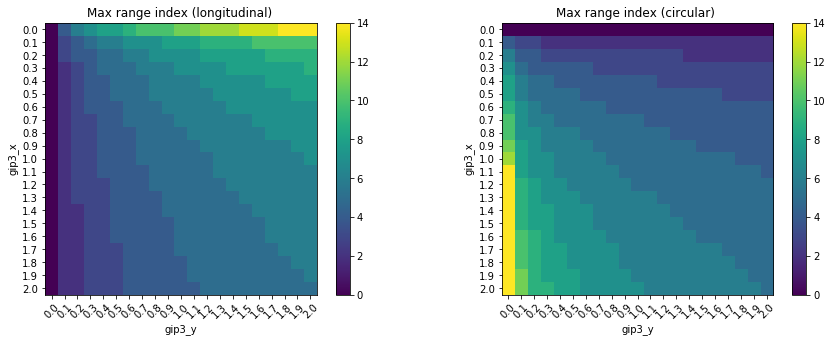

In [33]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(range_slow_y)
ax1.set_xticks(range(0, 21))
ax1.set_xticklabels(np.round(gip3y_range,1), rotation=45)
ax1.set_yticks(range(0, 21))
ax1.set_yticklabels(np.round(gip3x_range,1))
ax1.set_xlabel('gip3_y')
ax1.set_ylabel('gip3_x')
fig.colorbar(im1, ax=ax1, fraction=0.045)
ax1.set_title('Max range index (longitudinal) ')

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(range_slow_x)
ax2.set_xticks(range(0, 21))
ax2.set_xticklabels(np.round(gip3y_range,1), rotation=45)
ax2.set_yticks(range(0, 21))
ax2.set_yticklabels(np.round(gip3x_range,1))
ax2.set_xlabel('gip3_y')
ax2.set_ylabel('gip3_x')
fig.colorbar(im2, ax=ax2, fraction=0.045)
ax2.set_title('Max range index (circular) ')
plt.savefig('../results/figures/range_slow.pdf', bbox_inches='tight')
plt.show()

## Exploration

In [60]:
aa = calcium[19, 10, :, 15, 30:]
bb = calcium[15, 10, :, 15, 30:]
cc = calcium[10, 10, :, 15, 30:]
dd = calcium[5, 10, :, 15, 30:]
ee = calcium[0, 10, :, 15, 30:]

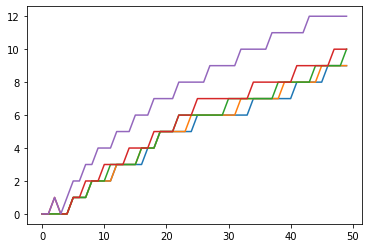

In [112]:
thres = 0.1
plt.plot(np.argmax(aa, axis=1))
plt.plot(np.argmax(bb, axis=1))
plt.plot(np.argmax(cc, axis=1))
plt.plot(np.argmax(dd, axis=1))
plt.plot(np.argmax(ee, axis=1))